# Naive Bayes

## Introduction

We will start by working on the Iris dataset. Recall that Iris dataset contains iris species and sepal and petal measurements. We will quickly explore the dataset and jump into Naive Bayes.

In [1]:
from __future__ import print_function
import os
#Data Path has to be set as per the file location in your system
#data_path = ['..', 'data']
#data_path = ['data']

## Question 1

* Load the Iris dataset.
* Take a quick look at the data types.
* Look at the skew values and decide if any transformations need to be applied. You can use skew value 0.75 as a threshold.
* Use `sns.pairplot` to plot the pairwise correlations and histograms. Use `hue="species"` as a keyword argument in order to see the distribution of species.

In [1]:
import pandas as pd
import numpy as np
#The filepath is dependent on the data_path set in the previous cell 
filepath = 'Iris_Data.csv'
data = pd.read_csv(filepath, sep=',', header=0)

In [3]:
data.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [2]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Notice that aside from the predictor variable, everything is float.

In [4]:
skew = pd.DataFrame(data.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

/Users/ashish/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


skew  too_skewed
sepal_length  0.314911       False
sepal_width   0.334053       False
petal_length -0.274464       False
petal_width  -0.104997       False

Fields are not too badly skewed.

In /Users/ashish/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/ashish/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/ashish/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/ashish/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/ashish/opt/anaconda3/lib/pytho

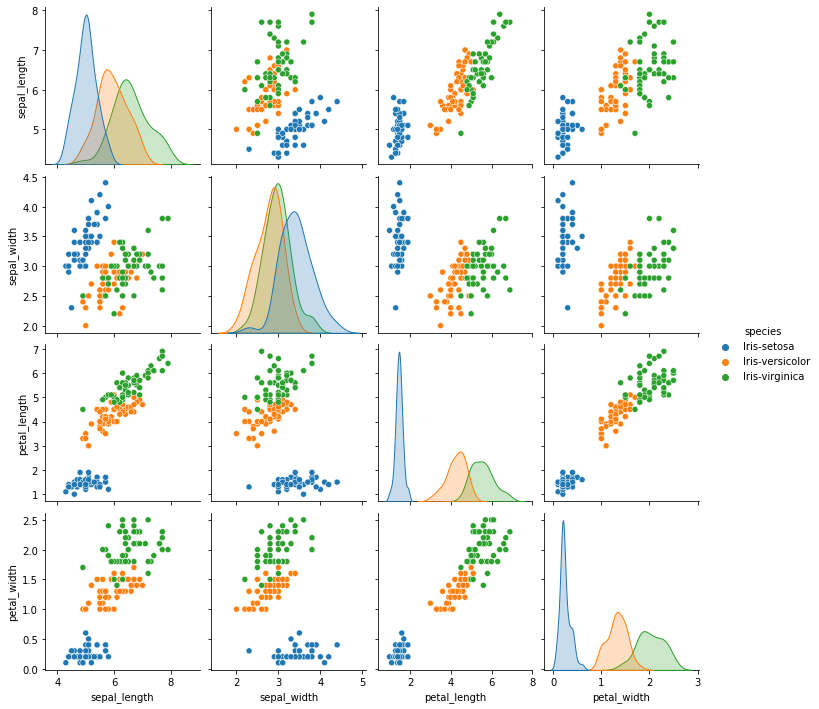

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(data, hue='species')

## Question 2

Let's now fit a Naive Bayes classifier to this data in order to predict "species".

* Pick the appropriate type of Naive Bayes given the nature of your dataset (data types of columns). Recall, choices are
    * GaussianNB
    * MultinomialNB
    * BernoulliNB
* Use `cross_val_score` to see how well your choice works.

In [10]:
# Since the features are continuous, the right choice is GaussianNB

from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
X = data[data.columns[:-1]]
y = data.species



In [11]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(X,y, test_size = 0.3 , random_state = 49)

In [12]:
x_train.shape , y_train.shape

((105, 4), (105,))

In [13]:
x_test.shape , y_test.shape

((45, 4), (45,))

In [14]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
print("BernoulliNB Training Accuracy :" , bnb.score(x_train, y_train))
print("BernoulliNB Testing Accuracy :" , bnb.score(x_test, y_test))

BernoulliNB Training Accuracy : 0.3523809523809524
BernoulliNB Testing Accuracy : 0.28888888888888886


In [18]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
print("MultinomialNB Training Accuracy :" , mnb.score(x_train, y_train))
print("MultinomialNB Testing Accuracy :" , mnb.score(x_test, y_test))

MultinomialNB Training Accuracy : 0.7714285714285715
MultinomialNB Testing Accuracy : 0.6888888888888889


In [19]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print("GaussianNB Training Accuracy :" , gnb.score(x_train, y_train))
print("GaussianNB Testing Accuracy :" , gnb.score(x_test, y_test))

GaussianNB Training Accuracy : 0.9619047619047619
GaussianNB Testing Accuracy : 0.9555555555555556
